In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:

df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


Text(0, 0.5, 'Height')

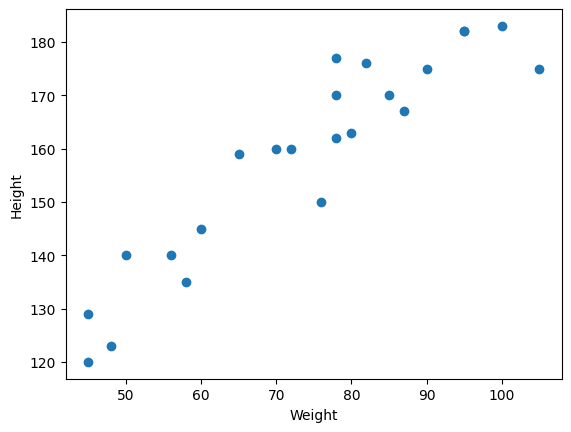

In [7]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')

In [8]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


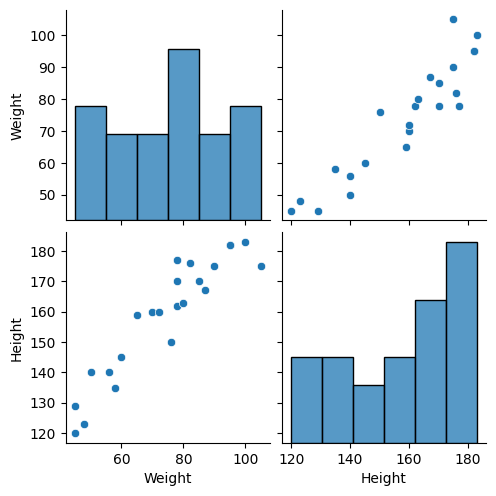

In [9]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [10]:
## Independent and Dependent Features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [11]:
X = df['Weight']
X


0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [12]:
X = df[['Weight']] ### Independent feature should be data frame or 2 dimensional
y = df['Height'] ## This variable can  be in series or in 1-D array



In [13]:
X = df[['Weight']] ### Independent feature should be data frame or 2 dimensional
np.array(X).shape
X.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [14]:
X_series= df['Weight']  ## one dimension
np.array(X_series).shape

(23,)

In [15]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [16]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape ## 2d

(17, 1)

### Standardization

In [18]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [22]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_series) ## Should be in 2d array

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

In [47]:
regression.fit(X_train,y_train) ## Should be in 2d array

LinearRegression(n_jobs=-1)

In [50]:
regression.coef_ ## slope (1 slope due to 1 independent feature)
# beta is output 

array([17.2982057])

In [51]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept: 156.47058823529412


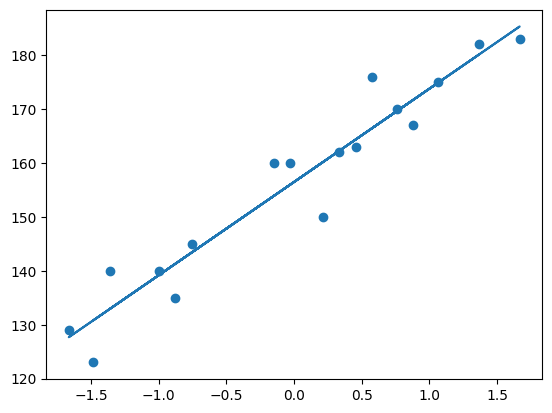

In [54]:
## Plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. Prediction height output = intercept + coef_(Weights)
2. y_pred_test = 156.470 + 1.26(X_test)

In [56]:
## Predction for test data
y_pred = regression.predict(X_test)

In [57]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R Square
Formula

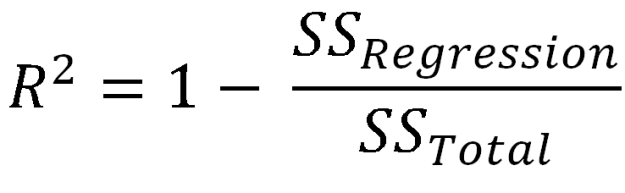

R^2: The coefficient of determination, or R-squared 

SSR: The sum of squared regression, or the sum of the residuals squared 

SST: The total sum of squares, or the sum of the distance the data is away from the mean squared 

In [59]:
from sklearn.metrics import r2_score

In [62]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


## Adjusted R Square
Formula

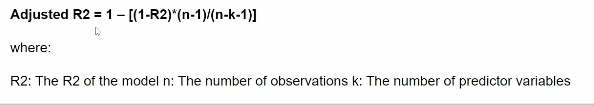



In [66]:
# Display adjusted R-Squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [68]:
## OLS Linear Regression
import statsmodels.api as sm

In [69]:
model = sm.OLS(y_train,X_train).fit()

In [71]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [73]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                       0.664
Time:                        16:53:23   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\ajits\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [74]:
## Prediction for new data
regression.predict([[72]]) ## Weissed Standarization

array([1401.94139895])

In [76]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\ajits\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])